# Introduction to Keras

In [ ]:
import tensorflow

*Check Tensorflow version.*

In [ ]:
tensorflow.__version__

'2.4.0'

*(Optional)* Install tensorflow

In [1]:
#!pip install tensorflow==2.3.1

### Target device : CPU / GPU ? (Google Colab)

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7112389045461082708
]


### Runtime GPU Switch

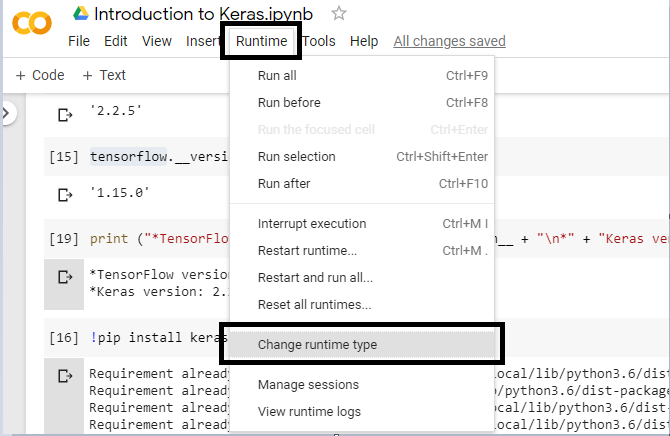

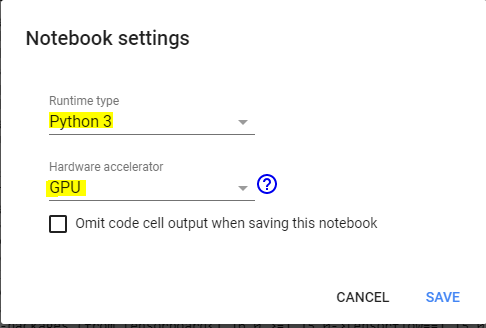

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9527052706896050825
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 3270355830966983329
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 12977534682078275843
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11330115994
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17168145054345431047
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


## Create your first Keras model

More info : https://keras.io/

## Task 1: Try to create a model with the following structure.

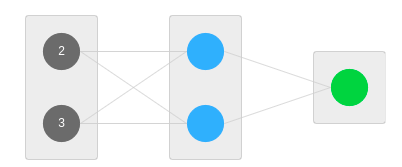

In [ ]:
# Solution 1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

first_model = Sequential()
first_model.add(Dense(2, input_dim=2, activation='relu'))
first_model.add(Dense(1, activation='sigmoid'))

In [ ]:
first_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


## Task 2: Create a new model with more filters

In [ ]:
#Solution 2
from tensorflow.keras.layers import Conv2D, MaxPooling2D
second_model = Sequential()
second_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
second_model.add(MaxPooling2D(pool_size=(2, 2)))
second_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
second_model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
second_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


## Task 3: Add Dense layers

In [ ]:
#Solution 3
from tensorflow.keras.layers import Flatten
third_model = Sequential()
third_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
third_model.add(MaxPooling2D(pool_size=(2, 2)))
third_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
third_model.add(MaxPooling2D(pool_size=(2, 2)))
third_model.add(Flatten())
third_model.add(Dense(10))
third_model.add(Dense(3))

In [ ]:
third_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                16010     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

## Plot model summary

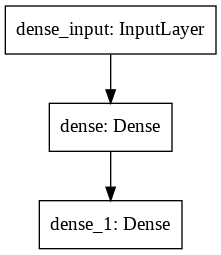

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(first_model)

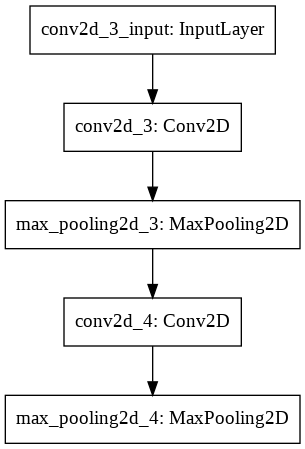

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(second_model)

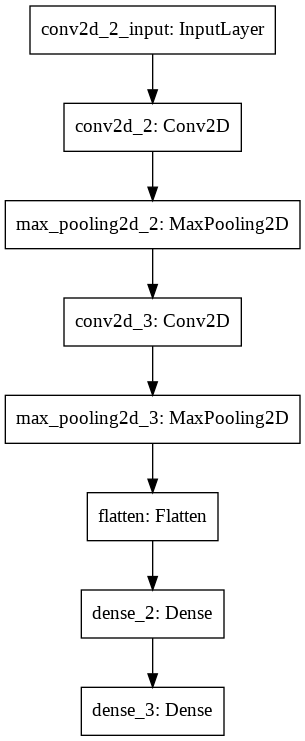

In [ ]:
from keras.utils import plot_model
plot_model(third_model)

## (Optional) Parameter Counts

*Opsiyonel* (filter_height * filter_width * input_image_channels + 1) * number_of_filters



---

*   filter_height = 3,
*   filter_weight = 3,
*   input_image_channels = 1
*   number_of_filters = 32



**total_param =** (3 x 3 x 1 + 1) x 32 = 320



---


*   filter_height = 3,
*   filter_weight = 3,
*   input_image_channels = 32
*   number_of_filters = 64

**total_param =** (3 x 3 x 32 + 1) x 64 = 18496

**18816 = 18496 + 320**
